In [17]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_normalized = pd.read_csv("Output/Preprocessed_CC_GENERAL.csv")


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)  # Scaling the training data


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalized)

In [21]:
kmeans_silhouette = silhouette_score(data_normalized, kmeans_labels)


In [22]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_normalized)

In [23]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(
        data_normalized[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]
    )
else:
    dbscan_silhouette = -1

In [24]:
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

K-means Silhouette Score: 0.2068
DBSCAN Silhouette Score: 0.0732


In [25]:
plt.figure(figsize=(18, 8))


<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

Text(0, 0.5, 'Feature 2')

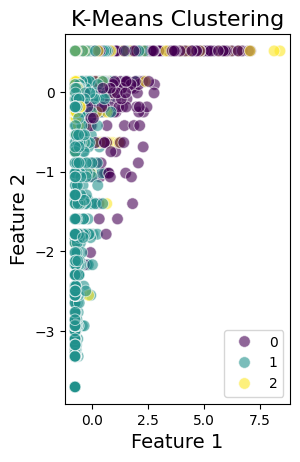

In [26]:
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=kmeans_labels, 
    palette="viridis", 
    legend='full',
    s=70,  # Marker size for better visibility
    alpha=0.6  # Transparency for overlapping points
)
plt.title("K-Means Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

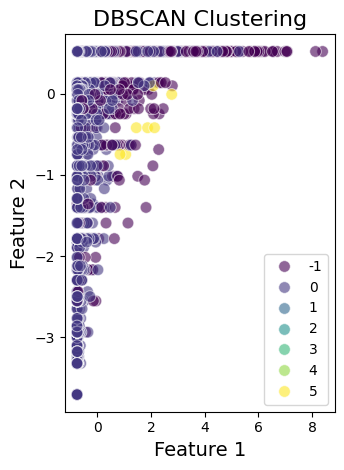

In [27]:
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=dbscan_labels, 
    palette="viridis", 
    legend='full',
    s=70,
    alpha=0.6
)
plt.title("DBSCAN Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
if kmeans_silhouette > dbscan_silhouette:
    print("K-means is recommended as it has a higher silhouette score.")
else:
    print("DBSCAN is recommended as it has a higher silhouette score or better noise handling.")

K-means is recommended as it has a higher silhouette score.


In [29]:
def preprocess_unseen_data(new_data, scaler):
    # Apply the same scaling as we did for the training data
    new_data_scaled = scaler.transform(new_data)
    return new_data_scaled

In [30]:
def predict_unseen_kmeans(new_data, kmeans, scaler):
    # Preprocess unseen data
    new_data_scaled = preprocess_unseen_data(new_data, scaler)
    
    # Predict the cluster label using the KMeans model
    predicted_label = kmeans.predict(new_data_scaled)
    return predicted_label

In [31]:
def predict_unseen_dbscan(new_data, dbscan, scaler):
    # Preprocess unseen data
    new_data_scaled = preprocess_unseen_data(new_data, scaler)
    
    # DBSCAN assigns -1 for outliers
    predicted_label = dbscan.fit_predict(new_data_scaled)
    return predicted_label

# Example unseen data (1 sample, adjust accordingly to your data structure)
unseen_data = pd.DataFrame({
    "Feature1": [5.2],  # Replace with an actual value for Feature1
    "Feature2": [3.8]
    # Include all the features that match the dataset structure
})

In [35]:
# Ensure unseen data has the same feature names as the training data
unseen_data = pd.DataFrame(unseen_data, columns=data_normalized.columns)

# Now preprocess and predict
predicted_kmeans = predict_unseen_kmeans(unseen_data, kmeans, scaler)
print(f"Predicted KMeans Cluster Label for Unseen Data: {predicted_kmeans}")

# Prediction using DBSCAN
predicted_dbscan = predict_unseen_dbscan(unseen_data, dbscan, scaler)
print(f"Predicted DBSCAN Cluster Label for Unseen Data: {predicted_dbscan}")


Predicted KMeans Cluster Label for Unseen Data: [1]
Predicted DBSCAN Cluster Label for Unseen Data: [-1]


c:\Users\mmeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
